In [1]:
input_list=[1,1,4,300,400,900]
flag = 0
i = 1
while i < len(input_list): 
    if(input_list[i] <= input_list[i - 1]): 
        flag = 1
    i += 1
      
# printing result 
if (not flag) : 
    print ("Yes") 
else : 
    
    print ("No") 

No


In [2]:
import pandas as pd 
df=pd.read_csv("insurance.csv")
df['BMI_group'] = pd.cut(df.bmi,[15,18.5,25,30,55],labels=['Underweight','Normal','Overweight','Obese'])
print(df.head(5))

   age     sex     bmi  children smoker     region      charges   BMI_group
0   19  female  27.900         0    yes  southwest  16884.92400  Overweight
1   18    male  33.770         1     no  southeast   1725.55230       Obese
2   28    male  33.000         3     no  southeast   4449.46200       Obese
3   33    male  22.705         0     no  northwest  21984.47061      Normal
4   32    male  28.880         0     no  northwest   3866.85520  Overweight


In [3]:
le = LabelEncoder()#use this encoder to encode values
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
#changing data type
df.BMI_group=df.BMI_group.astype(str)
le.fit(df.BMI_group.drop_duplicates()) 
df.BMI_group = le.transform(df.BMI_group)
print(df.head())

NameError: name 'LabelEncoder' is not defined

In [27]:
#df.drop(['bmi'], axis = 1, inplace = True)


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [5]:
corr1=df['smoker'].corr(df['bmi'])
print(round(corr1,4))
corr2=df['smoker'].corr(df['age'])
print(round(corr2,4))
corr3=df['smoker'].corr(df['charges'])
print(round(corr3,4))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [6]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
import numpy as np
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [69]:
df_train=pd.read_csv("insurance_training.csv", index_col=0)
df_train.head()

,age,sex,bmi,children,smoker,region,BMI_group,charges
560,46,0,19.95,2,0,1,1,9193.83850
1285,47,0,24.32,0,0,0,1,8534.67180
1142,52,0,24.86,0,0,2,1,27117.99378
969,39,0,34.32,5,0,2,2,8596.82780
486,54,0,21.47,3,0,1,1,12475.35130


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['age', 'charges','children']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-36-d455dede3da6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\91975\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


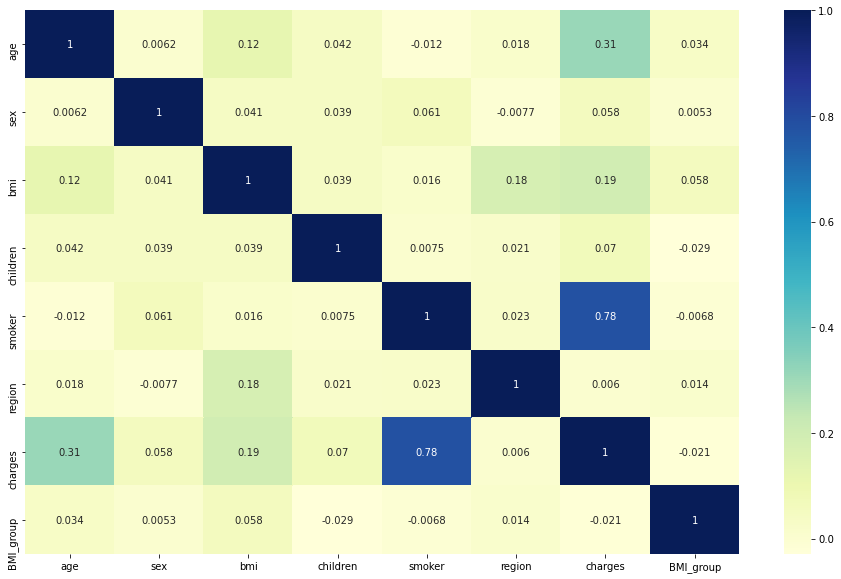

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [71]:
y_train = df_train.pop('charges')
X_train = df_train

In [73]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['smoker']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [77]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1660.
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.04e-219
Time:                        07:53:19   Log-Likelihood:                -11068.
No. Observations:                1070   AIC:                         2.214e+04
Df Residuals:                    1068   BIC:                         2.215e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8578.3225    258.076     33.240      0.0

In [80]:
y_test = df_test.pop('charges')
X_test = df_test



KeyError: 'charges'

In [ ]:
test['predicted_charges']= lr.predict(X_test)